In [1]:
# import libraries
import numpy as np
import pandas as pd
import os
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import re


from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# load in directories
from experiment_code.constants import Defaults

%load_ext autoreload
%autoreload 2

In [ ]:
#PREPROCESS_PILOT
#load in task data from gorilla
df1 = pd.read_csv(os.path.join(Defaults.RAW_DIR, "cort_language_gorilla_v1_sheet1.csv"))
df2 = pd.read_csv(os.path.join(Defaults.RAW_DIR, "cort_language_gorilla_v1_sheet2.csv"))
df3 = pd.read_csv(os.path.join(Defaults.RAW_DIR, "cort_language_gorilla_v2_sheet1.csv"))
df4 = pd.read_csv(os.path.join(Defaults.RAW_DIR, "cort_language_gorilla_v2_sheet2.csv"))


In [ ]:
# merge task dataframes
#df = df1.append([df2, df3, df4])
#df_v1 = df1.append(df2)
#df_v2 = df3.append(df4)
#df_sheet1 = df1.append(df3)
#df_sheet2 = df2.append(df4)
#df_english = df1_english.append([df2_english, df3_english, df4_english])

In [2]:
df = pd.read_csv(os.path.join(Defaults.RAW_DIR, "cort_language_gorilla_v3.csv"))
#different columns: no ANSWER, no condition, add cloze_descript, add condition_name (i.e. easy vs hard cloze), add CoRT_descript, add word_count
    #replace block_num for block
    #replace condition for CoRT_descript

In [2]:
df_english = pd.read_csv(os.path.join(Defaults.RAW_DIR, "prepilot_english_v3.csv"))

## Clean data

In [ ]:
# filter dataframe to remove redundant cols
df_filtered = df.filter({'Experiment ID', 'Experiment Version', 'Task Version','Participant Private ID', 'Spreadsheet Name', 'Spreadsheet Row', 'Zone Type', 'Reaction Time', 'Response', 'Correct', 'Incorrect', 'display', 'full_sentence', 
                        'last_word', 'sampled', 'target_word','random_word','ANSWER', 'cloze_probability', 'CoRT_mean', 'condition', 'sampled', 'block', 'cloze_probability', 
                        'condition', 'cloze_descript', 'condition_name', 'CoRT_descript', 'word_count', 'block_num'})

In [ ]:
#rename some columns
df_filtered = df_filtered.rename({'Zone Type':'zone_type', 'Reaction Time':'RT','Spreadsheet Row': 'sentence_num','Participant Private ID':'participant_ID', 'Experiment ID':'experiment_id', 'Task Version':'task_version', 
                    'Experiment Version':'experiment_version', 'Spreadsheet Name':'spreadsheet_version', 'ANSWER':'answer', 'Correct':'correct', 'Response':'response', 'Incorrect':'incorrect', 'cloze_probability':'cloze'}, axis=1)

In [ ]:
# select desired rows
df_filtered = df_filtered.query('zone_type=="response_keyboard_single"')
df_filtered

In [ ]:
#drop instruction rows
df_filtered = df_filtered[df_filtered.block_num != 0]
df_filtered

In [ ]:
# create dataframe only with correct responses
df_correct = df_filtered[df_filtered.correct != 0]
df_correct

In [ ]:
df_correct.sampled.unique()

In [ ]:
# create dataframe only with correct and meaningful responses
df_new_filtered = df_correct.query('sampled == False')
df_new_filtered

In [ ]:
print(df_filtered.cloze.min())

## Visualizations - collective dataset

In [ ]:
# ***distribution_of_correct_per_participant
# note: NA are counted as 0
df_filtered.participant_ID.unique()

plt.figure(figsize=(10,10));
sns.countplot(x='correct', hue='participant_ID', data= df_filtered);
plt.xlabel('incorrect vs correct', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('Number of correct answers per participant', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

In [ ]:
# distribution_of_correct
# note: NA are counted as 0

plt.figure(figsize=(10,10));
sns.countplot(x='correct', data= df_filtered);
plt.xlabel('incorrect vs correct', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('Number of correct answers', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
print('Answers mean:', df_filtered.correct.mean())
#print('Percentage of correct vs incorrect',df_filtered['correct'].value_counts(normalize=True) * 100)

In [ ]:
# distribution_of_responses
plt.figure(figsize=(10,10));
sns.countplot(x='response', data= df_filtered);
plt.xlabel('Response', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('Number of responses', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(df_filtered.groupby('full_sentence')['correct'].mean(), df_filtered.groupby('full_sentence')['correct'].std())
plt.xlabel('mean correct answers', fontsize = 20)
plt.ylabel('std of correct answers', fontsize = 20)
plt.title('item analysis of sentences', fontsize = 25)
plt.show()
#df_filtered.groupby('full_sentence').groups - look at groups represented

## Visualizations - RT Dist

In [ ]:
# rt_dist_correct
sns.distplot(df_correct['RT'])
plt.xlabel('RT', fontsize=20)
plt.title('Distribution of reaction time for correct responses', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.show()
print('RT mean:', df_correct.RT.mean())

In [ ]:
#investigating incorrect for fun
df_incorrect = df_filtered[df_filtered.correct != 1]
# rt_dist_incorrect
sns.distplot(df_incorrect['RT'])
plt.xlabel('RT', fontsize=20)
plt.title('Distribution of reaction time for incorrect responses', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.show()
print('RT mean:', df_incorrect.RT.mean())

In [ ]:
#**rt_distribution
sns.distplot(df_new_filtered['RT'])
plt.xlabel('RT', fontsize=20)
plt.title('Distribution of reaction time', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.show()
print('RT mean:', df_new_filtered.RT.mean())

## Visualizations - by version/block

In [ ]:
# run_rt_by_version
# rt for different levels
sns.set(rc={'figure.figsize':(20,10)})
# versions = dataframe['version'].unique()

sns.factorplot(x='block_num', y='RT', hue='condition_name', data=df_new_filtered)
#hue=task_version in other dataset
plt.xlabel('Run', fontsize=20),
plt.ylabel('RT', fontsize=20)
plt.title('', fontsize=20);
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)

plt.show()

In [ ]:
# run_accuracy_by_version
# accuracy across different levels
sns.set(rc={'figure.figsize':(20,10)})
# versions = dataframe['version'].unique()

sns.factorplot(x='block_num', y='correct', hue='condition_name', data=df_filtered)
#hue=task_version in other dataset
plt.xlabel('Run', fontsize=20),
plt.ylabel('% Correct', fontsize=20)
plt.title('', fontsize=20);
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.ylim(bottom=.7, top=1.0)

plt.show()

In [ ]:
# rt for different levels
sns.set(rc={'figure.figsize':(20,10)})

versions = df_correct['task_version'].unique()

for i, version in enumerate(versions):

    sns.factorplot(x='block_num', y='RT', hue='CoRT_descript', data=df_new_filtered.query(f'task_version == {version}'))
    plt.xlabel('Run', fontsize=20)
    plt.ylabel('Reaction Time', fontsize=20)
    plt.title(f'{versions[i]}', fontsize=20);
    plt.tick_params(axis = 'both', which = 'major', labelsize = 20)

    plt.show()

In [ ]:
versions

## Visualizations - by block

In [ ]:
# rt_across_blocks

## Visualizations - by cloze

In [ ]:
# accuracy_dist_with_cloze

In [ ]:
# rt_across_cloze

## Visualizations - from Maedbh's code

In [ ]:
#def cloze_distribution(self, dataframe):
    #sns.set(rc={'figure.figsize':(20,10)})

    #versions = dataframe['version'].unique()

#version_descripts = dataframe['version_descript'].unique()

for i, version in enumerate(versions):

    df = df_new_filtered.query(f'task_version=={version}')
    
    #looks at meaningful and correct

    sns.distplot(df['cloze'])
    plt.title(f'{versions[i]}', fontsize=20)
    plt.xlabel('cloze probability', fontsize=30)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 25)

    plt.show()

In [ ]:
#def cort_distribution(self, dataframe):

sns.set(rc={'figure.figsize':(20,10)})

    #versions = dataframe['version'].unique()
    #version_descripts = dataframe['version_descript'].unique()

for i, version in enumerate(versions):

    df = df_new_filtered.query(f'task_version=={version}')

    sns.distplot(df['CoRT_mean'])
    plt.title(f'{versions[i]}', fontsize=20)
    plt.xlabel('cort scaling', fontsize=30)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 25)

    plt.show()

In [ ]:
#only v17
#def describe_block_design(self, dataframe):
sns.set(rc={'figure.figsize':(20,10)})

versions = df_new_filtered['task_version'].unique()
#version_descripts = dataframe['version_descript'].unique()

for i, version in enumerate(versions):

    sns.countplot(x='block_num', hue='CoRT_descript', data=df_new_filtered.query(f'task_version=={version}'))
    plt.title(f'{versions[i]}', fontsize=20)
    plt.xlabel('block_design', fontsize=20)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 20)

    plt.show()

In [ ]:
#def distribution_cloze_by_run(self, dataframe):
plt.figure(figsize=(10,10))

versions = df_filtered['task_version'].unique()
runs = df_filtered['block_num'].unique()

# loop over versions
for i, version in enumerate(versions):

    # loop over runs and plot distribution
    for run in runs:

        sns.kdeplot(df_filtered.loc[df_filtered['block_num']==run]['CoRT_mean'], shade=True)

# plot stuff        
plt.title('distrubtion of CoRT scores across runs', fontsize=20)
plt.xlabel('CoRT scaling', fontsize=20)
plt.legend(runs, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [ ]:
#def distribution_cloze_by_run(self, dataframe):
plt.figure(figsize=(10,10))

versions = df_new_filtered['version'].unique()
runs = df_new_filtered['block_num'].unique()

dataframe = dataframe.query('CoRT_descript=="strong CoRT"')

# loop over versions
for i, version in enumerate(versions):

    # loop over runs and plot distribution
    for run in runs:

        sns.kdeplot(dataframe.loc[dataframe['block_num']==run]['cloze_probability'], shade=True)

# plot stuff        
plt.title('distrubtion of cloze probabilities across runs')
plt.xlabel('cloze probability', fontsize=20)
plt.legend(runs, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [ ]:
#def cort_distribution(self, dataframe):

sns.set(rc={'figure.figsize':(20,10)})

    #versions = dataframe['version'].unique()
    #version_descripts = dataframe['version_descript'].unique()

for i, version in enumerate(versions):

    df = df_new_filtered.query(f'task_version=={version}')
    
        # loop over runs and plot distribution
    for run in runs:

        sns.kdeplot(df.loc[df['block_num']==run]['cloze_probability'], shade=True)

# plot stuff        
plt.title('distrubtion of cloze probabilities across runs')
plt.xlabel('cloze probability', fontsize=20)
plt.legend(runs, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()


## Visualizations - grouped by sentence - NOT EDITED YET

In [ ]:
# group sentences and find mean and standard deviation for each
df_by_sentence = df_filtered.groupby(['full_sentence', 'cloze', 'CoRT_mean', 'condition','last_word','answer','target_word','random_word']).agg({'correct': ['mean', 'std']}).reset_index()
# join multilevel columns
df_by_sentence.columns = ["_".join(pair) for pair in df_by_sentence.columns]
df_by_sentence.columns = df_by_sentence.columns.str.strip('_')

In [ ]:
#some basic statistics for sentences
print('mean of correct responses', df_by_sentence.correct_mean.mean())
print('sd of correct responses', df_by_sentence.correct_std.mean())
print('max of correct responses', df_by_sentence.correct_mean.max())
print('min of correct responses', df_by_sentence.correct_mean.min())

In [ ]:
df_by_sentence.loc[df_by_sentence['correct_mean']<=0.5]

In [ ]:
def make_grouped_sentences_dataframe(dataframe, **kwargs):
    # create dataframe with the sentences grouped (i.e. one row for each sentence) and columns for mean and std of correct column
    # kwargs argument: 
        #correct_min: type "correct min" =
        #a decimal (0-1) of desired minimum percent of correct responses

    # group sentences and find mean and standard deviation for each
    df_by_sentence = df_filtered.groupby(['full_sentence', 'cloze', 'CoRT_mean', 'condition','last_word','answer','target_word','random_word']).agg({'correct': ['mean', 'std']}).reset_index()

    # join multilevel columns
    df_by_sentence.columns = ["_".join(pair) for pair in df_by_sentence.columns]
    df_by_sentence.columns = df_by_sentence.columns.str.strip('_')

    def _select_correct_min_mean(correct_min):
        # only returns sentences below a minimum percent of correct responses
        # input: a decimal between 0-1 

        return df_by_sentence.loc[df_by_sentence['correct_mean'] <= correct_min]

    if kwargs.get('correct_min'):
        correct_min = kwargs['correct_min']
        df_by_sentence = _select_correct_min_mean(correct_min)

    return df_by_sentence

make_grouped_sentences_dataframe(df_filtered, correct_min = 0.5)

In [ ]:
# correct_standard_deviation
plt.figure(figsize=(10,10))

sns.distplot(df_by_sentence['correct_std'])
plt.xlabel('standard deviation', fontsize=20)
plt.title('Distribution of standard deviation', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.show()

In [ ]:
# correct_mean_distribution
plt.figure(figsize=(10,10))

sns.distplot(df_by_sentence['correct_mean'])
plt.xlabel('mean', fontsize=20)
plt.title('Distribution of mean', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.show()

## Extra: english data analyzation

In [3]:
# filter dataframe to remove redundant cols
df_english_filtered = df_english.filter({'Experiment ID', 'Experiment Version', 'Participant Private ID', 'Spreadsheet Row', 'Zone Type', 'Reaction Time', 'Correct', 'Incorrect', 
                                        'display', 'response', 'type', 'item'})

In [4]:
# rename some columns
df_english_filtered = df_english_filtered.rename({'Experiment ID':'experiment_ID', 'Experiment Version':'experiment_version', 'Participant Private ID':'participant_ID', 'Spreadsheet Row': 'sentence_num', 'Zone Type':'zone_type', 'Reaction Time':'reaction_time', 
                                                  'Correct':'correct', 'Incorrect':'incorrect'}, axis=1)

In [5]:
# select desired rows
df_english_filtered = df_english_filtered.query('zone_type == "response_keyboard"')

In [6]:
# percentage of correct vs incorrect
df_english_filtered['correct'].value_counts(normalize=True) * 100

1.0    93.558952
0.0     6.441048
Name: correct, dtype: float64

In [7]:
df_english_filtered

,participant_ID,response,item,sentence_num,correct,experiment_ID,type,experiment_version,reaction_time,incorrect,display,zone_type
5,1456464.0,non,platery,2.0,1.0,17283.0,filler,13.0,1832.675000,0.0,main,response_keyboard
8,1456464.0,word,denial,3.0,1.0,17283.0,filler,13.0,736.000000,0.0,main,response_keyboard
11,1456464.0,word,generic,4.0,1.0,17283.0,filler,13.0,809.010000,0.0,main,response_keyboard
14,1456464.0,non,mensible,5.0,1.0,17283.0,non,13.0,1016.380000,0.0,main,response_keyboard
17,1456464.0,word,scornful,6.0,1.0,17283.0,word,13.0,624.170000,0.0,main,response_keyboard
20,1456464.0,word,stoutly,7.0,1.0,17283.0,word,13.0,1721.665000,0.0,main,response_keyboard
23,1456464.0,word,ablaze,8.0,1.0,17283.0,word,13.0,687.450000,0.0,main,response_keyboard
26,1456464.0,non,kermshaw,9.0,1.0,17283.0,non,13.0,814.930000,0.0,main,response_keyboard
29,1456464.0,word,moonlit,10.0,1.0,17283.0,word,13.0,646.405000,0.0,main,response_keyboard
32,1456464.0,word,lofty,11.0,1.0,17283.0,word,13.0,587.805000,0.0,main,response_keyboard


Answers mean: 0.9355895196506551


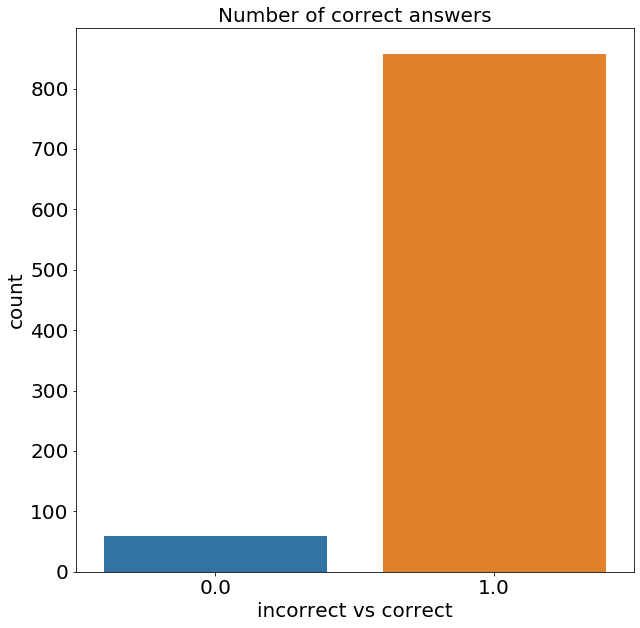

In [8]:
# distribution_of_correct_english
# note: NA are counted as 0

plt.figure(figsize=(10,10));
sns.countplot(x='correct', data= df_english_filtered);
plt.xlabel('incorrect vs correct', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('Number of correct answers', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

print('Answers mean:', df_english_filtered.correct.mean())

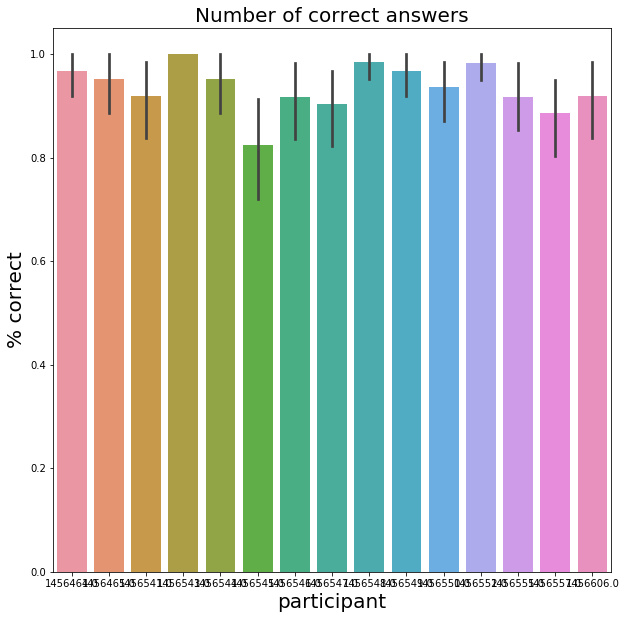

In [11]:
plt.figure(figsize=(10,10));
#sns.distplot(x='correct', data= df_english_filtered);
sns.barplot(x="participant_ID", y="correct", data=df_english_filtered)
#sns.barplot(x="participant_ID", y="correct", data=df_english_filtered)
plt.xlabel('participant', fontsize=20)
plt.ylabel('% correct', fontsize=20)
plt.title('Number of correct answers', fontsize=20);
plt.yticks(fontsize=20);

TypeError: 'NoneType' object is not iterable

<Figure size 720x720 with 0 Axes>

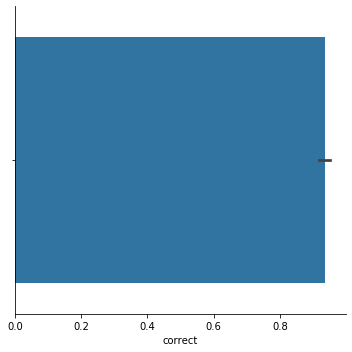

In [15]:
plt.figure(figsize=(10,10));
sns.catplot(x='correct', y= hue='participant_ID', kind = 'bar', data= df_english_filtered);
plt.xlabel('incorrect vs correct', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('Number of correct answers per participant', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

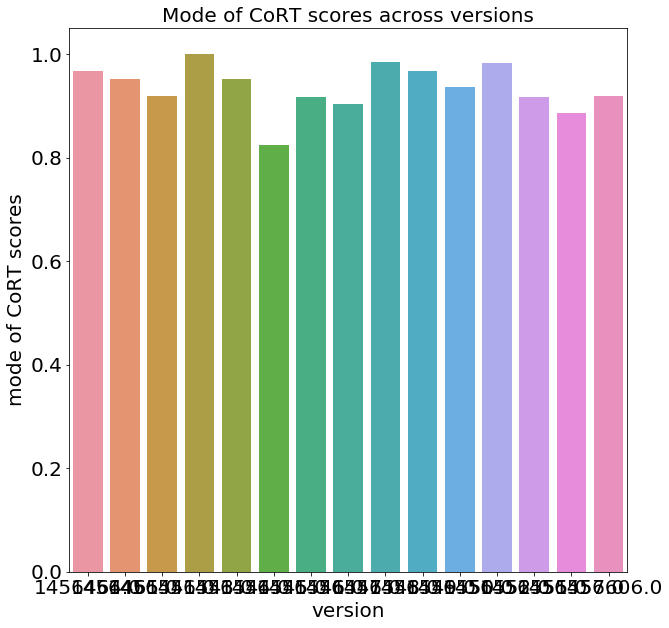

In [17]:
plt.figure(figsize=(10,10))
x = df_english_filtered.groupby('participant_').apply(lambda x: x[['correct']].mean()).reset_index()
sns.barplot(x=x['participant_ID'], y=x['correct']);
plt.xlabel('version', fontsize=20)
plt.ylabel('mode of CoRT scores', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Mode of CoRT scores across versions', fontsize=20);
plt.show()